In [5]:
import os

# 0. Segmentation

In [6]:
orig_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/segmentation/train_images"
mask_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/segmentation/train_masks"
only_mask_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/segmentation/train_only_masks"

In [ ]:
lower_black = np.array([255,255,255])
upper_black = np.array([255,255,255])

for img_path in os.listdir(mask_base_path):   
    mask = f"{mask_base_path}/{img_path}"
    mask = Image.open(f"{mask_base_path}/{img_path}").convert('RGB')
    mask = np.array(mask)
    mask = cv2.inRange(mask, lower_black, upper_black)
    mask = Image.fromarray(mask)
    mask.save(f"{only_mask_base_path}/{img_path}")

    #break

In [ ]:
num_pixels_x, num_pixels_y, num_channels = 1024//4, 768//4, 3

orig_images = np.zeros((len(os.listdir(orig_base_path)), num_pixels_x, num_pixels_y, num_channels), dtype=np.uint8)
mask_images = np.zeros((len(os.listdir(orig_base_path)), num_pixels_x, num_pixels_y), dtype=np.uint8)

In [ ]:
from tqdm import tqdm
for count, im_path in enumerate(tqdm(sorted(os.listdir(orig_base_path)))):

    im = Image.open(f"{orig_base_path}/{im_path}").convert('RGB')
    im = ImageOps.exif_transpose(im)
    im = im.resize((num_pixels_y, num_pixels_x))
    im = np.array(im)

    orig_images[count] = im
    #print(i)

In [ ]:
for count, im_path in enumerate(tqdm(sorted(os.listdir(only_mask_base_path)))):

    msk = Image.open(f"{only_mask_base_path}/{im_path}").convert('L')
    msk = ImageOps.exif_transpose(msk)
    msk = msk.resize((num_pixels_y, num_pixels_x))
    msk = np.array(msk)

    mask_images[count] = msk
    #print(i)

In [ ]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -10


cur_orig = orig_images[i]
cur_mask = mask_images[i]


axarr[0].imshow(cur_orig)
axarr[0].title.set_text('Cropped')

axarr[1].imshow(cur_mask, cmap='gray')
axarr[1].title.set_text('scanned')

In [ ]:
base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/segmentation"

pixel_size = num_pixels_x

    
with open(f"{base_path}/orig_{pixel_size}.npy", 'wb') as f:
    np.save(f, orig_images)
    
with open(f"{base_path}/mask_{pixel_size}.npy", 'wb') as f:
    np.save(f, mask_images)

# 1. Illumination

# Parse scaning images

In [309]:
data_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination"
orig_folder = "camera"
scan_folder = "scan"

In [44]:
all_camera_files = os.listdir(f"{data_base_path}/{orig_folder}")
all_scan_files = os.listdir(f"{data_base_path}/{scan_folder}")

In [45]:
all_camera_names = [file.split('.')[0] for file in all_camera_files]
all_scan_names = [file.split('.')[0] for file in all_scan_files]

In [46]:
print(len(all_camera_names))
print(len(all_scan_names))

987
634


In [47]:
no_cam_names = []
for file in os.listdir(f"{data_base_path}/{scan_folder}"):
    name = file.split('.')[0].split('_')[0]
    if name not in all_camera_names:
        no_cam_names.append(name)
        

no_scan_names = []
for file in os.listdir(f"{data_base_path}/{orig_folder}"):
    name = file.split('.')[0].split('_')[0]
    if name not in all_scan_names:
        #if name not in no_scan_names:
        no_scan_names.append(name)

In [48]:
print(len(no_cam_names))
print(len(no_scan_names))

103
73


In [49]:
no_cam_names

['강복은',
 '강순임',
 '강옥회',
 '강윤남',
 '강평임',
 '강평임',
 '고재원',
 '고재원',
 '곽경훈',
 '권창순',
 '길청남',
 '김경석',
 '김경화',
 '김미숙',
 '김상남',
 '김성석',
 '김연엽',
 '김옥자',
 '김우신',
 '김유속',
 '김윤자',
 '김이경',
 '김잉석',
 '김적남',
 '김정순b',
 '김종식',
 '김종식',
 '김중훈',
 '김진영',
 '김현미',
 '김형식',
 '김후자',
 '노미숙',
 '노점순',
 '노중운',
 '민병',
 '박경연',
 '박경희',
 '박동옥',
 '박말필',
 '박명순',
 '박수봉',
 '박순임',
 '박영곤',
 '박영숙',
 '박영자',
 '박인말',
 '박혜인',
 '방인숙',
 '방정자',
 '백옥임',
 '백이',
 '손분순',
 '손우정',
 '송학래',
 '신필권b',
 '신학룡',
 '안병옥',
 '양문심',
 '유기문',
 '유태순',
 '윤동웅',
 '윤승만',
 '윤승만',
 '윤혜정',
 '이경미',
 '이복회',
 '이상수',
 '이속희',
 '이순교',
 '이은육',
 '이점순',
 '이정민',
 '이한희',
 '이형관',
 '이호영',
 '임대섭',
 '임언수',
 '임춘득',
 '장란순',
 '장평임',
 '전봉선',
 '정귀달',
 '정멍희',
 '정병님',
 '정상량',
 '정정옥',
 '정태석',
 '정희자',
 '조상순',
 '조순덕',
 '조향순',
 '최길문',
 '최들자',
 '최묵형',
 '최순임',
 '추예섭',
 '탁현철',
 '특이 처방전1',
 '하추자',
 '한종대',
 '허광호',
 '황규순']

In [50]:
no_scan_names

['강윤상b',
 '강윤상b',
 '강윤수',
 '강윤순',
 '강평임a',
 '강평임b',
 '강평임b',
 '강후자',
 '고등오b',
 '고재원a',
 '고재원a',
 '권기봄',
 '김문결',
 '김성헌',
 '김성헌',
 '김옥자b',
 '김용일',
 '김용일',
 '김윤지',
 '김적남b',
 '김종년',
 '김종년',
 '김종식a',
 '김천자',
 '김천자',
 '노정순',
 '노종준',
 '박동욱',
 '박말필a',
 '박염자',
 '박염자',
 '박영성',
 '박영성',
 '박정이',
 '박정이',
 '배은순',
 '배은순',
 '백옥임a',
 '백옥임a',
 '변창우',
 '변창우',
 '신봉주a',
 '신봉주b',
 '옥계순',
 '옥계순',
 '윤부남',
 '윤성오',
 '윤승만a',
 '윤해정',
 '이경대',
 '이경대',
 '이월선',
 '이월선',
 '이점순a',
 '이점순a',
 '이정민b',
 '이정인',
 '정춘자',
 '정춘자',
 '조순덕a',
 '조순덕b',
 '조순덕b',
 '조은순',
 '조은순',
 '최길문a',
 '최길문a',
 '최운수',
 '표정순',
 '표정순',
 '황규손',
 '황규손',
 '황명자b',
 '황명자b']

In [11]:
import pandas as pd
pd.DataFrame(no_scan_names).to_csv("test.csv", encoding='euc-kr', index=False)

# Create new folder for final files

In [332]:
from PIL import Image, ImageOps
import numpy as np
import copy

final_orig_folder = "final_camera_good"
final_scan_folder = "final_scan_good"


orig_folder = "camera_good"
all_camera_files = os.listdir(f"{data_base_path}/{orig_folder}")
all_camera_names = [file.split('.')[0] for file in all_camera_files]

In [333]:
for file in os.listdir(f"{data_base_path}/{scan_folder}"):
    name = file.split('.')[0]#.split('_')[0]
    
    if name in all_camera_names:
        #no_cam_names.append(name)
        base_name = copy.deepcopy(name)
        count = 2
        while name in all_camera_names:
            orig = Image.open(f"{data_base_path}/{scan_folder}/{file}")
            orig.save(f"{data_base_path}/{final_scan_folder}/{name}.jpg")
            
            name = f"{base_name}_{count}"
            count+=1
            
        
        #break

In [334]:
scan_folder = "final_scan_good"
all_scan_files = os.listdir(f"{data_base_path}/{scan_folder}")
all_scan_names = [file.split('.')[0] for file in all_scan_files]

In [335]:
from pillow_heif import register_heif_opener

register_heif_opener()


In [336]:
for file in os.listdir(f"{data_base_path}/{orig_folder}"):
    name = file.split('.')[0].split('_')[0]
    save_name = file.split('.')[0]#.split('_')[0]
    
    if name in all_scan_names:
        orig = Image.open(f"{data_base_path}/{orig_folder}/{file}")
        orig = ImageOps.exif_transpose(orig)

        orig.save(f"{data_base_path}/{final_orig_folder}/{save_name}.jpg")

# Crop images (Make masks, then crop)

# Test one

In [474]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch

import numpy as np
import random
import copy
import time
from sklearn.model_selection import train_test_split

import os
import cv2
from PIL import Image, ImageOps
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [475]:
test_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_camera_good"

i = 8
test_img_path = sorted(os.listdir(test_images_base_path))[i]

In [490]:
num_pixels_x, num_pixels_y, num_channels = 1024, 768, 3

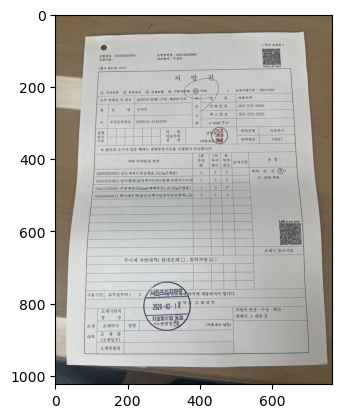

In [491]:
im = Image.open(f"{test_images_base_path}/{test_img_path}")
im = ImageOps.exif_transpose(im)
im_original = copy.deepcopy(im)
im_original = np.array(im_original)
im = im.resize((num_pixels_y, num_pixels_x))
im = np.array(im)
plt.imshow(im)

In [492]:
from models.u2net import U2NETP, U2NET
segment = U2NETP(out_ch=1).to(device)

In [494]:
segmentation_model_path = './weights/mask_0402_fin.pth'

segment.load_state_dict(torch.load(segmentation_model_path))

<All keys matched successfully>

In [495]:
norm_mean = [ 0.485, 0.456, 0.406 ]
norm_std  = [ 0.229, 0.224, 0.225 ]

loader = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize(mean = norm_mean, std = norm_std)])

In [496]:
image = loader(im)
image = image.unsqueeze(0).to(device)

In [497]:
with torch.no_grad():
    mask = segment(image)
    
mask_det = torch.permute(mask[0].detach().cpu(), (0, 2,3, 1)).numpy()
mask_det = mask_det>0.8

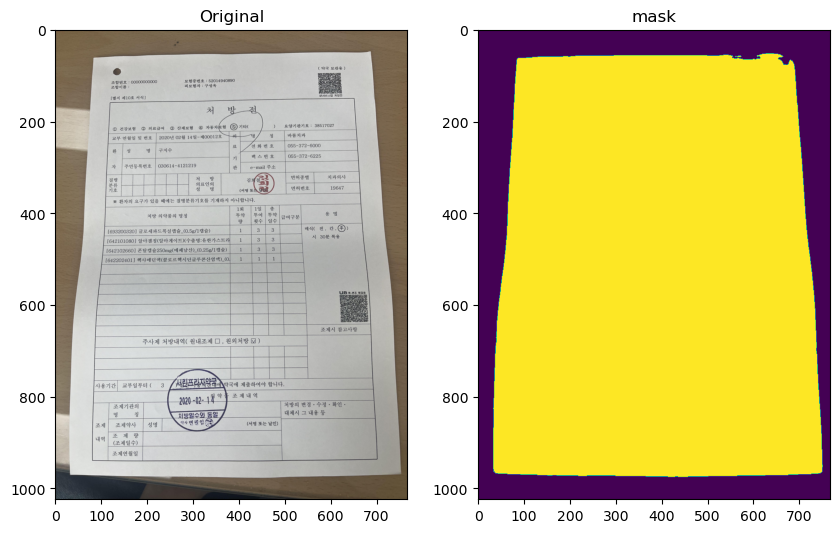

In [498]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -6

axarr[0].imshow(im)
axarr[0].title.set_text('Original')

axarr[1].imshow(mask_det[0])
axarr[1].title.set_text('mask', cmap='gray')

In [505]:

contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

simplified_contours = []

for cnt in contours:
    hull = cv2.convexHull(cnt)
    simplified_contours.append(cv2.approxPolyDP(hull,
                                                0.001 * cv2.arcLength(hull, True), True))
biggest_n, approx_contour = biggest_contour(simplified_contours, 12192768)

warped = four_point_transform(im_original, approx_contour)

[[[2694  270]]

 [[2950 3801]]

 [[ 132 3801]]

 [[ 333  250]]]
---------
[[ 333.  250.]
 [2694.  270.]
 [2950. 3801.]
 [ 132. 3801.]]


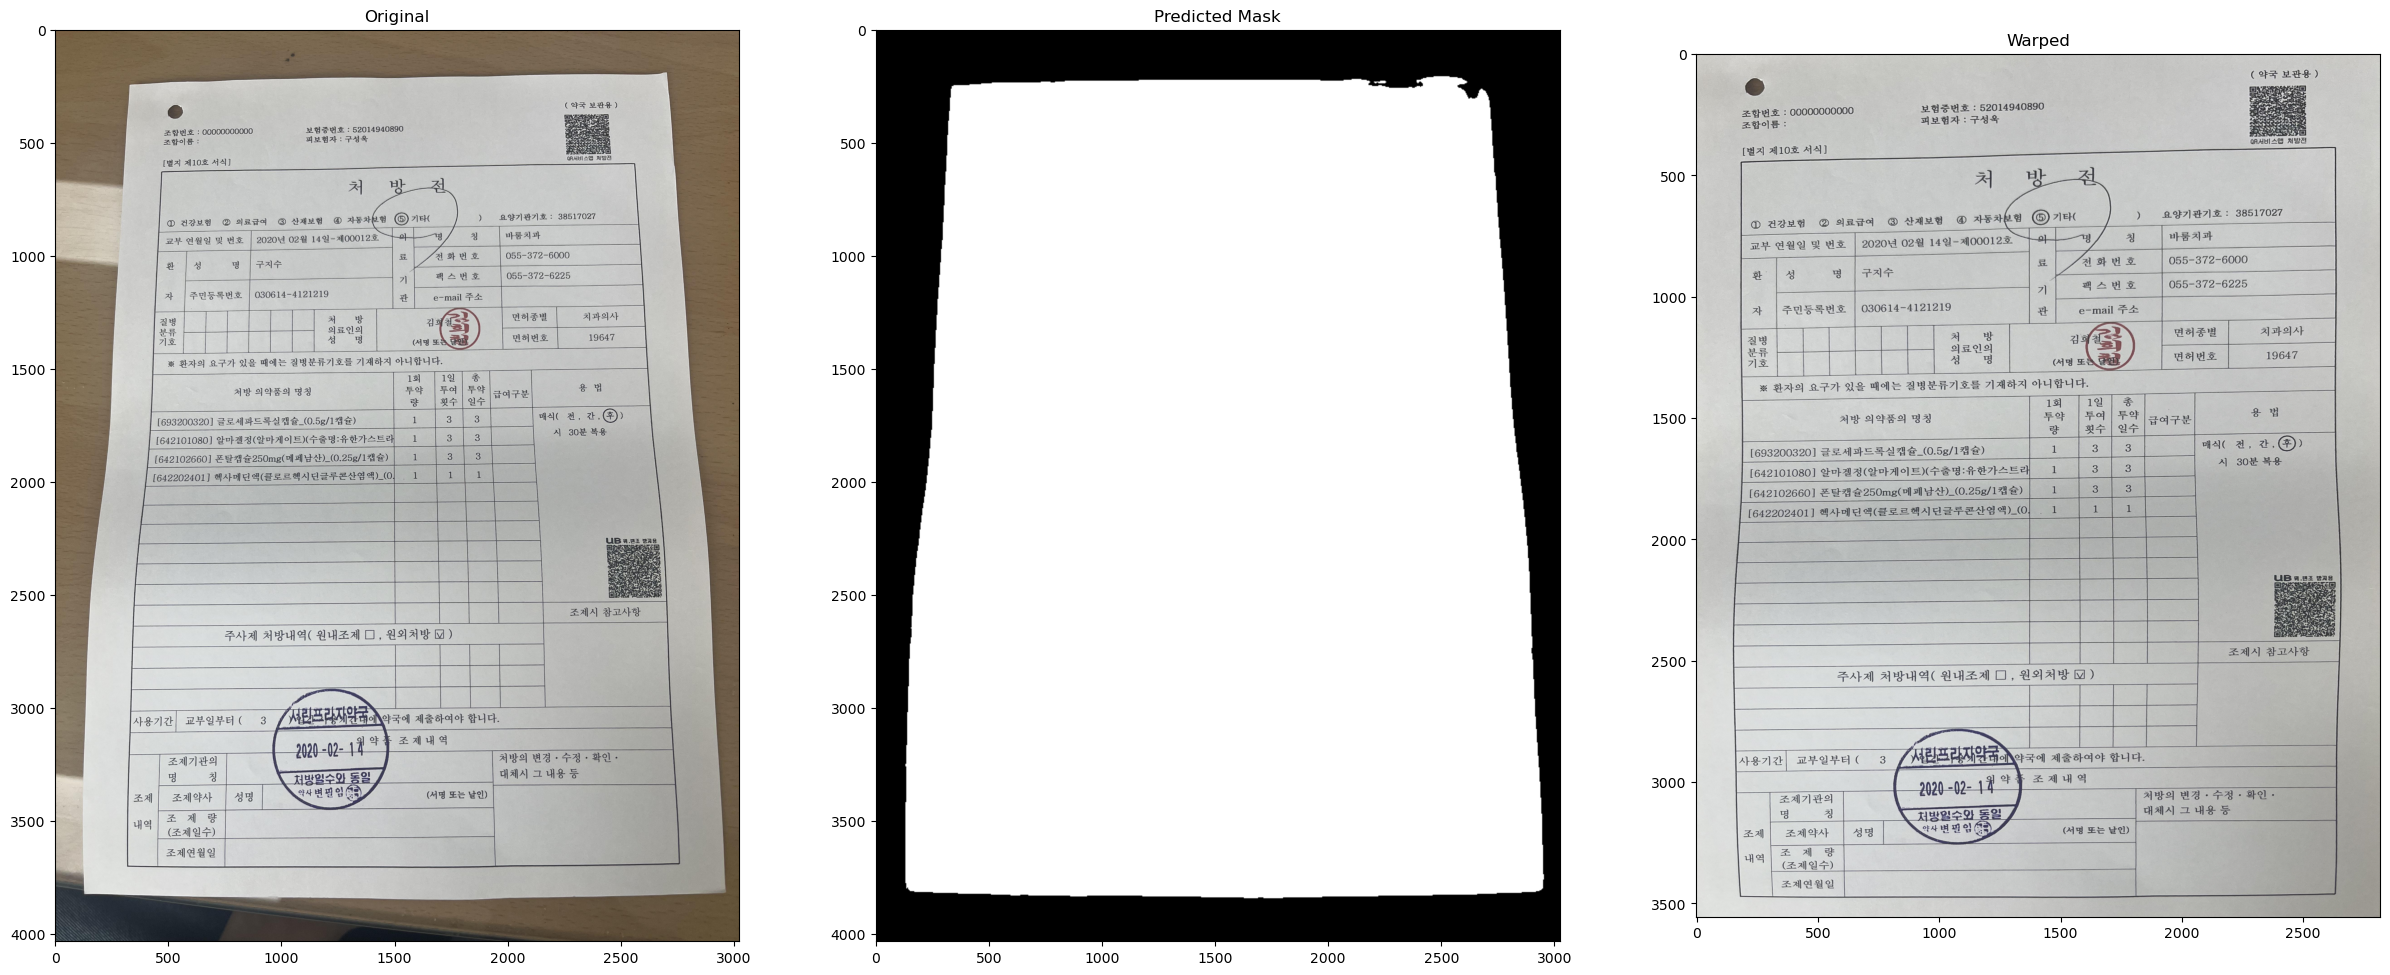

In [448]:
f, axarr = plt.subplots(1,3, figsize=(30,21))

i = -6
#cur_scan = scan_images[i]


axarr[0].imshow(im_original)
axarr[0].title.set_text('Original')

axarr[1].imshow(mask_to_find, cmap='gray')
axarr[1].title.set_text('Predicted Mask')

axarr[2].imshow(warped)
axarr[2].title.set_text('Warped')

# Make all masks

In [351]:
test_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_camera_good"
crop_images_save_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_crop_good"
#orig_folder = "final_camera"


from models.u2net import U2NETP, U2NET
segment = U2NETP(out_ch=1).to(device)

segmentation_model_path = './weights/mask_0402_fin.pth'
segment.load_state_dict(torch.load(segmentation_model_path))

loader = transforms.Compose([transforms.ToTensor()])

In [352]:
num_pixels_x, num_pixels_y, num_channels = 1024, 768, 3

In [354]:
def biggest_contour(contours, min_area):
    biggest = None
    max_area = 0
    biggest_n = 0
    approx_contour = None
    for n, i in enumerate(contours):
        area = cv2.contourArea(i)

        if area > min_area / 30:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
                biggest_n = n
                approx_contour = approx

    return biggest_n, approx_contour


def order_points(pts):
    pts = pts.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")

    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))


    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

In [1]:
for test_img_path in sorted(os.listdir(test_images_base_path)):

    im = Image.open(f"{test_images_base_path}/{test_img_path}")
    im = ImageOps.exif_transpose(im)
    im_original = copy.deepcopy(im)
    im_original = np.array(im_original)
    im = im.resize((num_pixels_y, num_pixels_x))
    im = np.array(im)

    
    image = loader(im).float()
    image = image.unsqueeze(0).to(device)
    

    with torch.no_grad():
        mask = segment(image)

    mask_det = torch.permute(mask[0].detach().cpu(), (0, 2,3, 1)).numpy()
    mask_det = mask_det>0.8

    mask_to_find = mask_det[0]
    mask_to_find = np.array(mask_to_find*255).astype(np.uint8)
    mask_to_find = Image.fromarray(mask_to_find[:,:,0])

    x,y,_ = im_original.shape
    mask_to_find = mask_to_find.resize((y, x))
    mask_to_find = np.array(mask_to_find)
    
    contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    simplified_contours = []

    try:
        for cnt in contours:
            hull = cv2.convexHull(cnt)
            simplified_contours.append(cv2.approxPolyDP(hull,
                                                        0.001 * cv2.arcLength(hull, True), True))
        biggest_n, approx_contour = biggest_contour(simplified_contours, 1000)

        warped = four_point_transform(im_original, approx_contour)
        PIL_image = Image.fromarray(warped.astype('uint8'), 'RGB')
        PIL_image.save(f"{crop_images_save_path}/{test_img_path}")
    except Exception as e:
        print(f"error: {e} -- file: {test_img_path}")

    #break

NameError: name 'os' is not defined

# Make numpy arrays

In [746]:
import numpy as np
from tqdm import tqdm
from PIL import Image, ImageOps
import os
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt


# crop_images_save_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_crop_flat"
# scan_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_scan_flat"

crop_images_save_path = "./data/wrinkle_scan"
scan_images_base_path = "./data/scan"

In [747]:
import torch

def make_image_splits(im_crop, im_scan):
    
#     size_x = 512 # patch size
#     size_y = 384 # patch stride
    size_x = 256 # patch size
    size_y = 256 # patch stride

    torch_cur_orig = torch.from_numpy(im_crop)
    torch_cur_scan = torch.from_numpy(im_scan)

    torch_cur_orig = torch_cur_orig.unsqueeze(0)
    torch_cur_scan = torch_cur_scan.unsqueeze(0)
    torch_cur_orig.shape

    patches_orig = torch_cur_orig.unfold(1, size_x, size_x).unfold(2, size_y, size_y)
    patches_scan = torch_cur_scan.unfold(1, size_x, size_x).unfold(2, size_y, size_y)


    unfold_shape = patches_orig.size()
    patches_orig = patches_orig.contiguous().view(-1, 3, size_x, size_y)
    patches_scan = patches_scan.contiguous().view(-1, 3, size_x, size_y)

    patches_orig_np = np.array(patches_orig)
    patches_scan_np = np.array(patches_scan)

    patches_orig_np = np.transpose(patches_orig_np, (0, 2, 3, 1))
    patches_scan_np = np.transpose(patches_scan_np, (0, 2, 3, 1))

    return patches_orig_np, patches_scan_np

In [748]:
# num_pixels_x, num_pixels_y, num_channels = 1333//1, 1000//1, 3
num_pixels_x, num_pixels_y, num_channels = 1024*1, 768*1, 3
# num_pixels_x, num_pixels_y, num_channels = 2048//1, 1536//1, 3

crop_images = np.zeros((len(os.listdir(scan_images_base_path))*12, num_pixels_x//4, num_pixels_x//4, num_channels), dtype=np.uint8)
scan_images = np.zeros((len(os.listdir(scan_images_base_path))*12, num_pixels_x//4, num_pixels_x//4, num_channels), dtype=np.uint8)

In [749]:
from tqdm import tqdm
for count, im_path in enumerate(tqdm(sorted(os.listdir(scan_images_base_path)))):

    cur_count = count * 12
    im_crop = Image.open(f"{crop_images_save_path}/{im_path}").convert('RGB')
    im_scan = Image.open(f"{scan_images_base_path}/{im_path}").convert('RGB')
    
    im_crop = ImageOps.exif_transpose(im_crop)
    im_scan = ImageOps.exif_transpose(im_scan)
    
    im_crop = im_crop.resize((num_pixels_y, num_pixels_x))
    im_scan = im_scan.resize((num_pixels_y, num_pixels_x))
    
    im_crop = np.array(im_crop)
    im_scan = np.array(im_scan)
    
    im_crop_splits, im_scan_splits = make_image_splits(im_crop, im_scan)

    for i in range(12):
        crop_images[cur_count+i] = im_crop_splits[i]
        scan_images[cur_count+i] = im_scan_splits[i]
    
#     break
    #if count > 10:
        #break
    #print(i)

100%|████████████████████████████████████████████████████████████████████████████████| 634/634 [01:54<00:00,  5.52it/s]


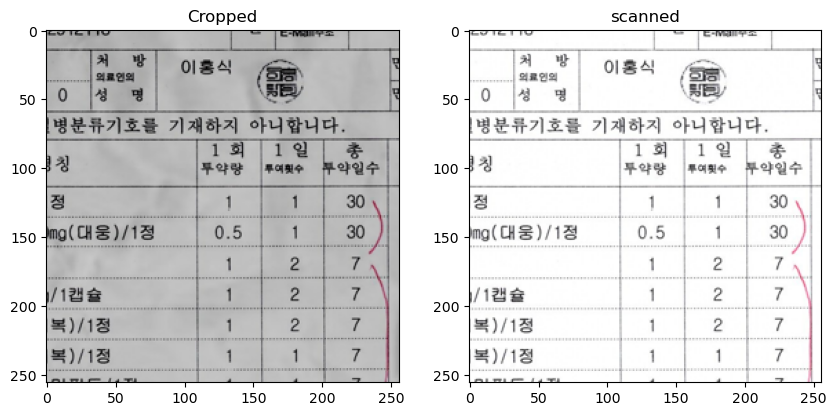

In [750]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -200


cur_orig = crop_images[i]
cur_mask = scan_images[i]


axarr[0].imshow(cur_orig)
axarr[0].title.set_text('Cropped')

axarr[1].imshow(cur_mask, cmap='gray')
axarr[1].title.set_text('scanned')

In [324]:
# base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination"

# pixel_size = num_pixels_x

    
# with open(f"{base_path}/crop_{pixel_size}_wrinkle_sliced_12.npy", 'wb') as f:
#     np.save(f, crop_images)
    
# with open(f"{base_path}/scan_{pixel_size}_wrinkle_sliced_12.npy", 'wb') as f:
#     np.save(f, scan_images)

In [751]:
import cv2
import copy
def deform(img, perturbed_mesh):
    h,w = img.shape[:2]

    perturbed_mesh_x = perturbed_mesh[:,0]
    perturbed_mesh_y = perturbed_mesh[:,1]
    
    perturbed_mesh_x =perturbed_mesh_x.reshape((h,w))
    perturbed_mesh_y =perturbed_mesh_y.reshape((h,w))

    remapped = cv2.remap(img, perturbed_mesh_x, perturbed_mesh_y, cv2.INTER_LINEAR) 

    return remapped

def get_perturbed_mesh(img):
    """
        Author: papabiceps
        https://stackoverflow.com/q/53907633
    """

    # mesh row & col
    mr,mc = img.shape[:2]

    xx = np.arange(0, mr, 1)
    yy = np.arange(mc-1, -1, -1)

    # yy = np.arange(0, mc, 1)
    [Y, X] = np.meshgrid(xx, yy)

    ms = np.transpose(np.asarray([X.flatten('F'), Y.flatten('F')]), (1,0))

    perturbed_mesh = ms
    nv = np.random.randint(20) - 1

    for k in range(nv):
        #Choosing one vertex randomly
        vidx = np.random.randint(np.shape(ms)[0])
        vtex = ms[vidx, :]
        #Vector between all vertices and the selected one
        xv  = perturbed_mesh - vtex
        #Random movement 
        mv = (np.random.rand(1,2) - 0.5)*30
        hxv = np.zeros((np.shape(xv)[0], np.shape(xv)[1] +1) )
        hxv[:, :-1] = xv
        hmv = np.tile(np.append(mv, 0), (np.shape(xv)[0],1))
        d = np.cross(hxv, hmv)
        d = np.absolute(d[:, 2])
        d = d / (np.linalg.norm(mv, ord=2))
        wt = d
        
        curve_type = np.random.rand(1)
        if curve_type > 0.3:
            alpha = np.random.rand(1) * 50 + 50
            wt = alpha / (wt + alpha)
        else:
            alpha = np.random.rand(1) + 1
            wt = 1 - (wt / 100 )**alpha
        msmv = mv * np.expand_dims(wt, axis=1)

        perturbed_mesh = perturbed_mesh + msmv

        perturbed_mesh = perturbed_mesh.astype(np.float32)

        if perturbed_mesh is not None:
            result = deform(img, perturbed_mesh)

            flipped = cv2.flip(result,1)

            return flipped

In [752]:
# num_pixels_x, num_pixels_y, num_channels = 1024//2, 768//2, 3
# num_pixels_x, num_pixels_y, num_channels = 1600, 1200, 3

aug_x = np.zeros((crop_images.shape), dtype=np.uint8)
aug_y = np.zeros((crop_images.shape), dtype=np.uint8)

In [753]:
count = 0
for x,y in zip(crop_images, scan_images):
    try:
        im_flip = get_perturbed_mesh(copy.deepcopy(x))
        aug_x[count] = im_flip
        aug_y[count] = y
        
        count+=1
    except:
        print("skip: {count}")
        
    if count % 50:
        print(count)

1
2
3
skip: {count}
3
skip: {count}
3
4
5
6
7
skip: {count}
7
skip: {count}
7
8
9
10
11
skip: {count}
11
skip: {count}
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
skip: {count}
39
40
41
42
43
44
45
46
47
48
49
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
skip: {count}
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
skip: {count}
89
90
91
92
93
94
95
96
97
98
99
101
102
103
104
105
106
107
108
109
110
111
112
113
114
skip: {count}
114
115
116
117
118
119
120
121
skip: {count}
121
122
123
124
125
126
127
128
skip: {count}
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
151
152
153
154
155
156
skip: {count}
156
157
158
159
160
161
162
163
164
skip: {count}
164
165
166
167
168
169
170
171
172
173
174
175
176
skip: {count}
176
177
178
179
skip: {count}
179
180
skip: {count}
180
181
182
183
184
185
186
187
188
189
skip: {count}
189
190
skip: {count}
190
191
192
193
194
195
196
skip: 

1399
1401
skip: {count}
1401
1402
skip: {count}
1402
1403
skip: {count}
1403
1404
1405
1406
1407
1408
1409
1410
1411
skip: {count}
1411
1412
1413
1414
1415
1416
1417
1418
1419
skip: {count}
1419
1420
1421
1422
1423
1424
1425
1426
skip: {count}
1426
1427
skip: {count}
1427
skip: {count}
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
skip: {count}
1443
1444
1445
1446
1447
1448
1449
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
skip: {count}
1462
1463
1464
1465
skip: {count}
1465
1466
1467
skip: {count}
1467
1468
1469
skip: {count}
1469
1470
1471
1472
skip: {count}
1472
skip: {count}
1472
skip: {count}
1472
1473
skip: {count}
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
skip: {count}
1493
1494
1495
1496
1497
skip: {count}
1497
1498
1499
skip: {count}
1499
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525


2589
2590
2591
2592
skip: {count}
2592
2593
skip: {count}
2593
skip: {count}
2593
2594
2595
skip: {count}
2595
2596
2597
2598
2599
skip: {count}
2601
2602
2603
2604
2605
skip: {count}
2605
2606
skip: {count}
2606
2607
2608
2609
skip: {count}
2609
2610
2611
2612
skip: {count}
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
skip: {count}
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
skip: {count}
2662
2663
2664
2665
2666
2667
skip: {count}
2667
2668
2669
2670
skip: {count}
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
skip: {count}
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2701
2702
skip: {count}
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
skip: {count}
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2

3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
skip: {count}
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
skip: {count}
3829
3830
3831
skip: {count}
3831
3832
skip: {count}
3832
3833
3834
3835
3836
3837
3838
skip: {count}
3838
3839
3840
3841
skip: {count}
3841
3842
3843
3844
3845
3846
3847
3848
skip: {count}
3848
3849
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
skip: {count}
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
skip: {count}
3878
skip: {count}
3878
3879
3880
3881
3882
3883
skip: {count}
3883
3884
3885
3886
3887
3888
3889
skip: {count}
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
skip: {count}
3901
3902
3903
3904
3905
skip: {count}
3905
3906
skip: {count}
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
skip: {count}
3918
3919
3920
skip: {count}
3920
3921
3922
3923
skip: {count}
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
393

4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5001
5002
5003
5004
skip: {count}
5004
5005
5006
skip: {count}
5006
5007
5008
5009
5010
5011
skip: {count}
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
skip: {count}
5033
skip: {count}
5033
5034
5035
5036
5037
5038
5039
5040
5041
skip: {count}
5041
5042
5043
5044
5045
5046
5047
5048
5049
5051
5052
5053
5054
5055
skip: {count}
5055
5056
5057
5058
5059
5060
skip: {count}
5060
5061
5062
5063
5064
skip: {count}
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
skip: {count}
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5101
5102
skip: {count}
5102
5103
5104
5105
skip: {count}
5105
skip: {count}
5105
5106
5107
skip: {count}
5107
5108
5109
5110
5111
skip: {count}
5111
5112
5113
5114
5115
5116
5117
5118
skip: {count}
5118
5119
skip: {count}
5119
5120
5121
5122
5123
51

6189
6190
6191
6192
6193
6194
6195
6196
skip: {count}
6196
6197
6198
skip: {count}
6198
6199
6201
6202
skip: {count}
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
skip: {count}
6215
6216
6217
6218
6219
6220
6221
skip: {count}
6221
6222
6223
6224
skip: {count}
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
skip: {count}
6243
skip: {count}
6243
6244
6245
6246
6247
6248
6249
skip: {count}
6249
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
skip: {count}
6266
6267
6268
6269
6270
skip: {count}
6270
skip: {count}
6270
6271
skip: {count}
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
skip: {count}
6287
6288
6289
6290
6291
6292
6293
6294
6295
skip: {count}
6295
skip: {count}
6295
6296
6297
6298
6299
6301
skip: {count}
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
skip: {count}
6317
6318
6319
6320
6321
6322
632

In [754]:
aug_x = aug_x[:count]
aug_y = aug_y[:count]

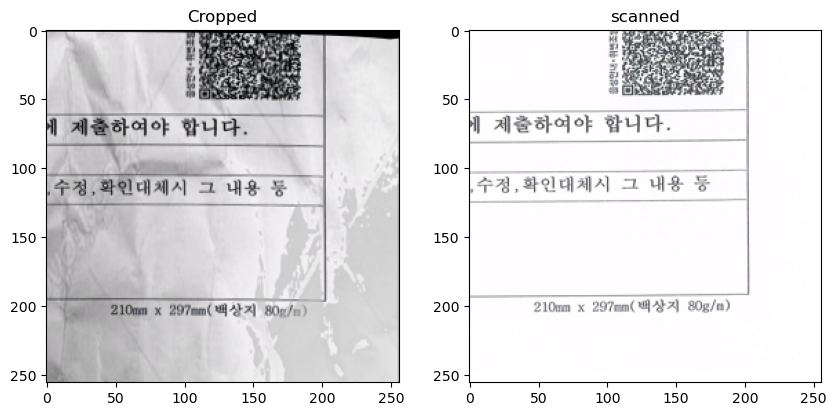

In [763]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -1


cur_orig = aug_x[i]
cur_mask = aug_y[i]


axarr[0].imshow(cur_orig)
axarr[0].title.set_text('Cropped')

axarr[1].imshow(cur_mask, cmap='gray')
axarr[1].title.set_text('scanned')

In [756]:
crop_images = np.concatenate([crop_images, aug_x], axis=0)
scan_images = np.concatenate([scan_images, aug_y], axis=0)

In [764]:
base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination"

pixel_size = num_pixels_x

    
with open(f"{base_path}/crop_{pixel_size}_scan_sliced_12.npy", 'wb') as f:
    np.save(f, aug_x)
    
with open(f"{base_path}/scan_{pixel_size}_scan_sliced_12.npy", 'wb') as f:
    np.save(f, aug_y)

# Make wrinkled images

In [695]:
import os
base_path = "./data/scan"
file_names = os.listdir(base_path)

for count, file_name in enumerate(file_names):
    os.rename(f"{base_path}/{file_name}", f"{base_path}/{count}.jpg")

In [745]:
import cv2
import numpy as np

base_path_scan = "./data/scan"
base_path_wrinkle = "./data/wrinkle"
base_path_save = "./data/wrinkle_scan"

for file_name in sorted(os.listdir(base_path)):
    img = cv2.imread(f"{base_path_scan}/{file_name}").astype("float32") / 255.0
    img -= random.uniform(0.1, 0.5)
    hh, ww = img.shape[:2]

    # im_scan = cv2.cvtColor(im_scan,cv2.COLOR_BGR2RGB) 
    wrinkles = cv2.imread(f"{base_path_wrinkle}/{np.random.randint(0,3)}.jpg", 0).astype("float32") / 255.0
    
    
    # resize wrinkles to same size as cat image
    wrinkles = cv2.rotate(wrinkles, np.random.randint(0, 3))
    wrinkles = cv2.resize(wrinkles, (ww,hh), fx=0, fy=0)
    
    rand = random.uniform(0,1)
    if rand >= 0.2:
        wrinkles = 1.33 * wrinkles -0.33

        # threshold wrinkles and invert
        thresh = cv2.threshold(wrinkles,0.5,1,cv2.THRESH_BINARY)[1]
        thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR) 
        thresh_inv = 1-thresh

        # shift image brightness so mean is mid gray
        mean = np.mean(wrinkles)
        shift = mean - 0.5
        wrinkles = cv2.subtract(wrinkles, shift)

        # convert wrinkles from grayscale to rgb
        wrinkles = cv2.cvtColor(wrinkles,cv2.COLOR_GRAY2BGR) 

        # do hard light composite and convert to uint8 in range 0 to 255
        # see CSS specs at https://www.w3.org/TR/compositing-1/#blendinghardlight
        low = 2.0 * img * wrinkles
        high = 1 - 2.0 * (1-img) * (1-wrinkles)
        result = ( 255 * (low * thresh_inv + high * thresh) ).clip(0, 255).astype(np.uint8)
        
    else:
        # shift image brightness so mean is (near) mid gray
        mean = np.mean(wrinkles)
        shift = mean - 0.4
        wrinkles = cv2.subtract(wrinkles, shift)

        # create folds image as diagonal grayscale gradient as float as plus and minus equal amount
        hh1 = math.ceil(hh/2)
        ww1 = math.ceil(ww/3)
        val = math.sqrt(0.2)
        grady = np.linspace(-val, val, hh1, dtype=np.float32)
        gradx = np.linspace(-val, val, ww1, dtype=np.float32)
        grad1 = np.outer(grady, gradx)

        # flip grad in different directions
        grad2 = cv2.flip(grad1, 0)
        grad3 = cv2.flip(grad1, 1)
        grad4 = cv2.flip(grad1, -1)

        # concatenate to form folds image
        foldx1 = np.hstack([grad1-0.1,grad2,grad3])
        foldx2 = np.hstack([grad2+0.1,grad3,grad1+0.2])
        folds = np.vstack([foldx1,foldx2])
        #folds = (1-val)*folds[0:hh, 0:ww]
        folds = folds[0:hh, 0:ww]

        # add the folds image to the wrinkles image
        wrinkle_folds = cv2.add(wrinkles, folds)

        # draw creases as blurred lines on black background
        creases = np.full((hh,ww), 0, dtype=np.float32)
        ww2 = 2*ww1
        cv2.line(creases, (0,hh1), (ww-1,hh1), 0.25, 1)
        cv2.line(creases, (ww1,0), (ww1,hh-1),  0.25, 1)
        cv2.line(creases, (ww2,0), (ww2,hh-1),  0.25, 1)

        # blur crease image
        creases = cv2.GaussianBlur(creases, (3,3), 0)

        # add crease to wrinkles_fold image
        wrinkle_folds_creases = cv2.add(wrinkle_folds, creases)

        # threshold wrinkles and invert
        thresh = cv2.threshold(wrinkle_folds_creases,0.7,1,cv2.THRESH_BINARY)[1]
        thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR) 
        thresh_inv = 1-thresh

        # convert from grayscale to bgr 
        wrinkle_folds_creases = cv2.cvtColor(wrinkle_folds_creases,cv2.COLOR_GRAY2BGR) 

        low = 2.0 * img * wrinkle_folds_creases
        high = 1 - 2.0 * (1-img) * (1-wrinkle_folds_creases)
        result = ( 255 * (low * thresh_inv + high * thresh) ).clip(0, 255).astype(np.uint8)

    

    
    cv2.imwrite(f"{base_path_save}/{file_name}", result)
    #break

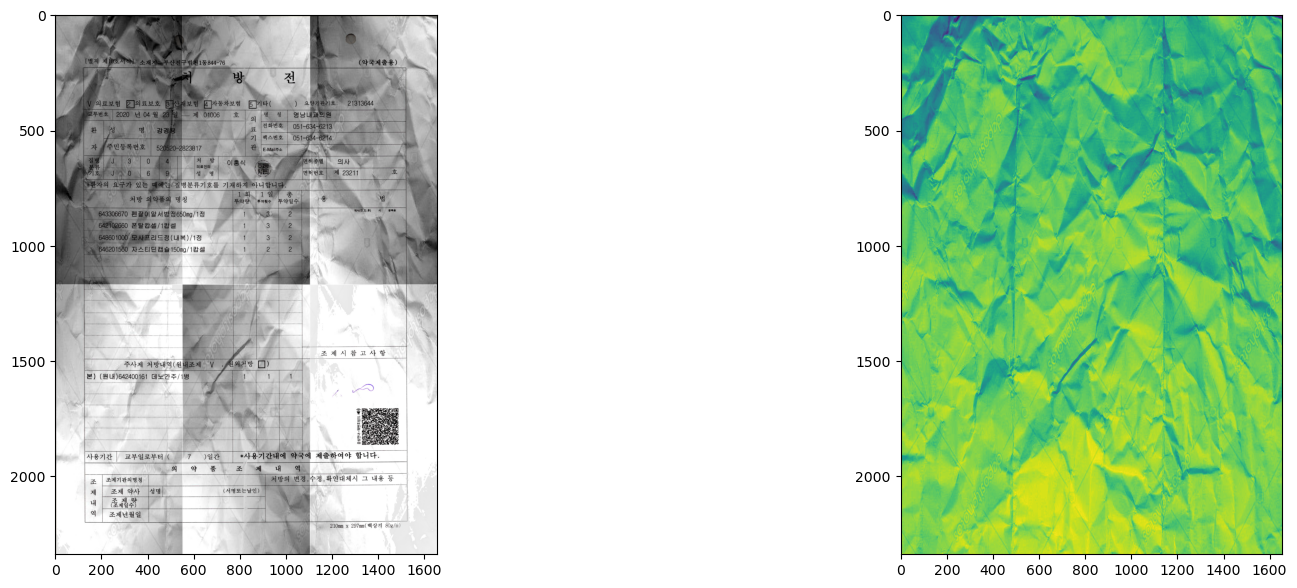

In [732]:
f, axarr = plt.subplots(1,2, figsize=(20,7))

axarr[0].imshow(result)
axarr[1].imshow(wrinkles)

In [184]:
import torch

def preprocess_image_splits(im_crop):
    
    size_x = 800 # patch size
    size_y = 600 # patch stride

    patches_crop = im_crop.unfold(2, size_x, size_x).unfold(3, size_y, size_y)
    patches_crop = patches_crop.contiguous().view(-1, 3, size_x, size_y)

    unfold_shape = patches_crop.size()
    print(patches_crop.shape)

In [175]:
im_crop.shape

(1600, 1200, 3)

In [183]:
torch_cur_crop = torch.from_numpy(im_crop)
torch_cur_crop = torch_cur_crop.unsqueeze(0)
torch_cur_crop = torch_cur_crop.permute(0,3, 1,2)
torch_cur_crop.shape

torch.Size([1, 3, 1600, 1200])

In [185]:
preprocess_image_splits(torch_cur_crop)

torch.Size([4, 3, 800, 600])


In [163]:
import torch
i = 0

cur_orig = crop_images[i]
cur_mask = scan_images[i]

In [138]:
torch_cur_orig = torch.from_numpy(cur_orig)
torch_cur_scan = torch.from_numpy(cur_mask)

torch_cur_orig = torch_cur_orig.unsqueeze(0)
torch_cur_scan = torch_cur_scan.unsqueeze(0)
torch_cur_orig.shape

torch.Size([1, 800, 600, 3])

In [123]:
size_x = 800 # patch size
size_y = 600 # patch stride
patches_orig = torch_cur_orig.unfold(1, size_x, size_x).unfold(2, size_y, size_y)
patches_scan = torch_cur_scan.unfold(1, size_x, size_x).unfold(2, size_y, size_y)

In [124]:
unfold_shape = patches_orig.size()
patches_orig = patches_orig.contiguous().view(-1, 3, size_x, size_y)
patches_scan = patches_scan.contiguous().view(-1, 3, size_x, size_y)



patches_orig_np = np.array(patches_orig)
patches_scan_np = np.array(patches_scan)

patches_orig_np = np.transpose(patches_orig_np, (0, 2, 3, 1))
patches_scan_np = np.transpose(patches_scan_np, (0, 2, 3, 1))

In [125]:
patches_orig_np.shape

(4, 800, 600, 3)

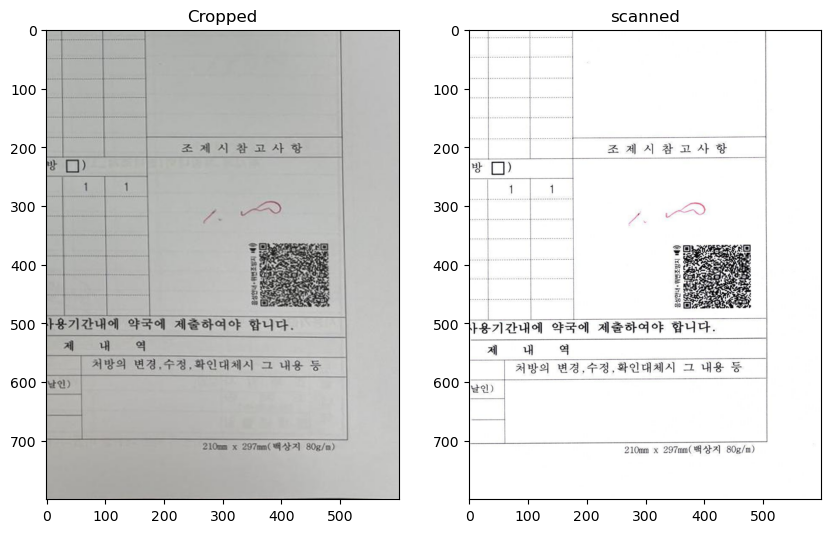

In [113]:
f, axarr = plt.subplots(1,2, figsize=(10,7))
i = 3
axarr[0].imshow(patches_orig_np[i])
axarr[0].title.set_text('Cropped')

axarr[1].imshow(patches_scan_np[i], cmap='gray')
axarr[1].title.set_text('scanned')

In [114]:
unfold_shape

torch.Size([1, 2, 2, 3, 800, 600])

In [115]:
patches_orig = patches_orig.view(unfold_shape)
patches_scan = patches_scan.view(unfold_shape)

output_c = 3
output_h = 1600
output_w = 1200
patches_orig = patches_orig.permute(0, 3, 1, 4, 2, 5).contiguous()
patches_scan = patches_scan.permute(0, 3, 1, 4, 2, 5).contiguous()

patches_orig = patches_orig.view(1, output_c, output_h, output_w)
patches_scan = patches_scan.view(1, output_c, output_h, output_w)

In [116]:
patches_orig_np = np.array(patches_orig)
patches_scan_np = np.array(patches_scan)

patches_orig_np = np.transpose(patches_orig_np, (0, 2, 3, 1))
patches_scan_np = np.transpose(patches_scan_np, (0, 2, 3, 1))

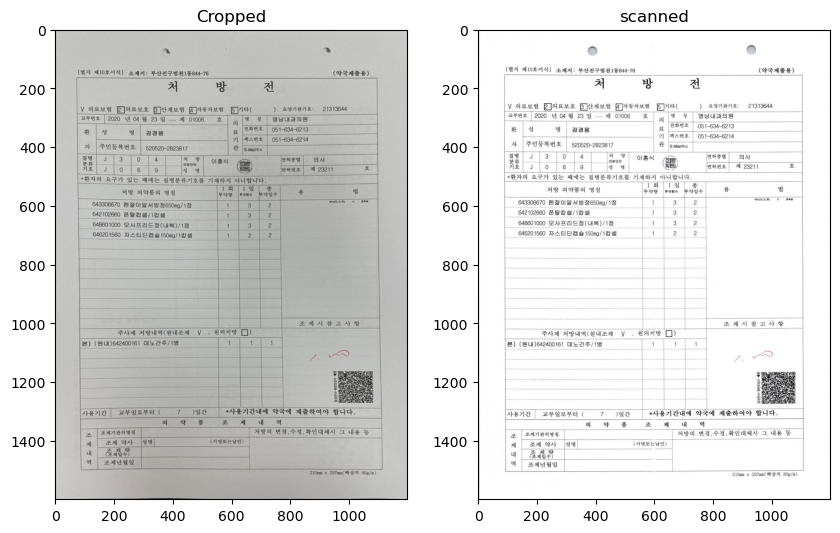

In [117]:
f, axarr = plt.subplots(1,2, figsize=(10,7))
i = 0
axarr[0].imshow(patches_orig_np[i])
axarr[0].title.set_text('Cropped')

axarr[1].imshow(patches_scan_np[i], cmap='gray')
axarr[1].title.set_text('scanned')